In [1]:
# importing the required libraries
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import metrics
data = pd.DataFrame()

In [2]:
# reading the data
data = pd.read_csv("rainfall in india 1901-2015.csv")
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [4]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [5]:
data.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4111    False
4112    False
4113    False
4114    False
4115    False
Length: 4116, dtype: bool>

In [6]:
data.isnull().any()

SUBDIVISION    False
YEAR           False
JAN             True
FEB             True
MAR             True
APR             True
MAY             True
JUN             True
JUL             True
AUG             True
SEP             True
OCT             True
NOV             True
DEC             True
ANNUAL          True
Jan-Feb         True
Mar-May         True
Jun-Sep         True
Oct-Dec         True
dtype: bool

In [11]:
data['SUBDIVISION'].value_counts()

SUBDIVISION
WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH    

In [14]:
data.isnull().any()

SUBDIVISION    False
YEAR           False
JAN             True
FEB             True
MAR             True
APR             True
MAY             True
JUN             True
JUL             True
AUG             True
SEP             True
OCT             True
NOV             True
DEC             True
ANNUAL          True
Jan-Feb         True
Mar-May         True
Jun-Sep         True
Oct-Dec         True
dtype: bool

In [15]:
data.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909], dtype=int64)

In [16]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [17]:
data.shape

(4116, 19)

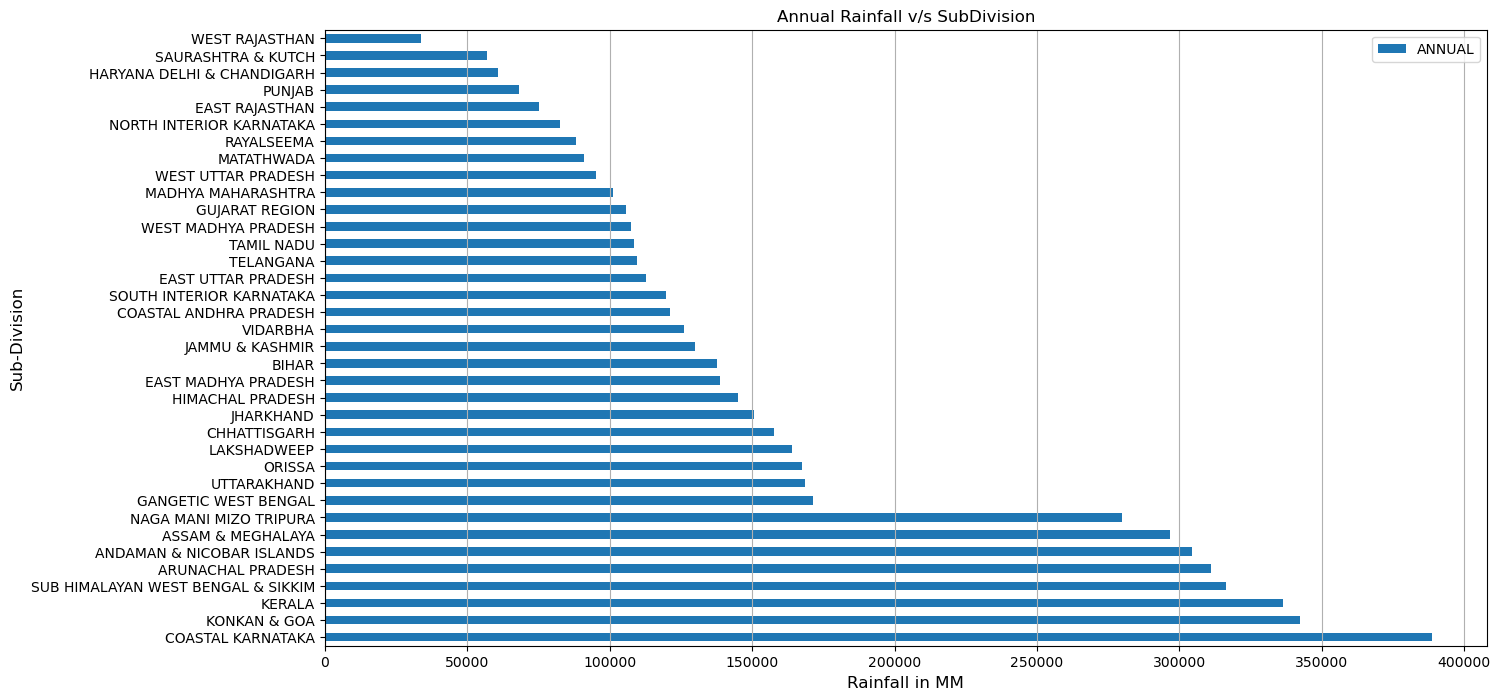

In [18]:
data[["SUBDIVISION", "ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL', ascending=False).plot(kind='barh', stacked=True, figsize=(15, 8))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivision")
plt.grid(axis="x", linestyle="-")
plt.show()                                                                                                                                                                                                                                                         

In [19]:
print(data.columns)

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')


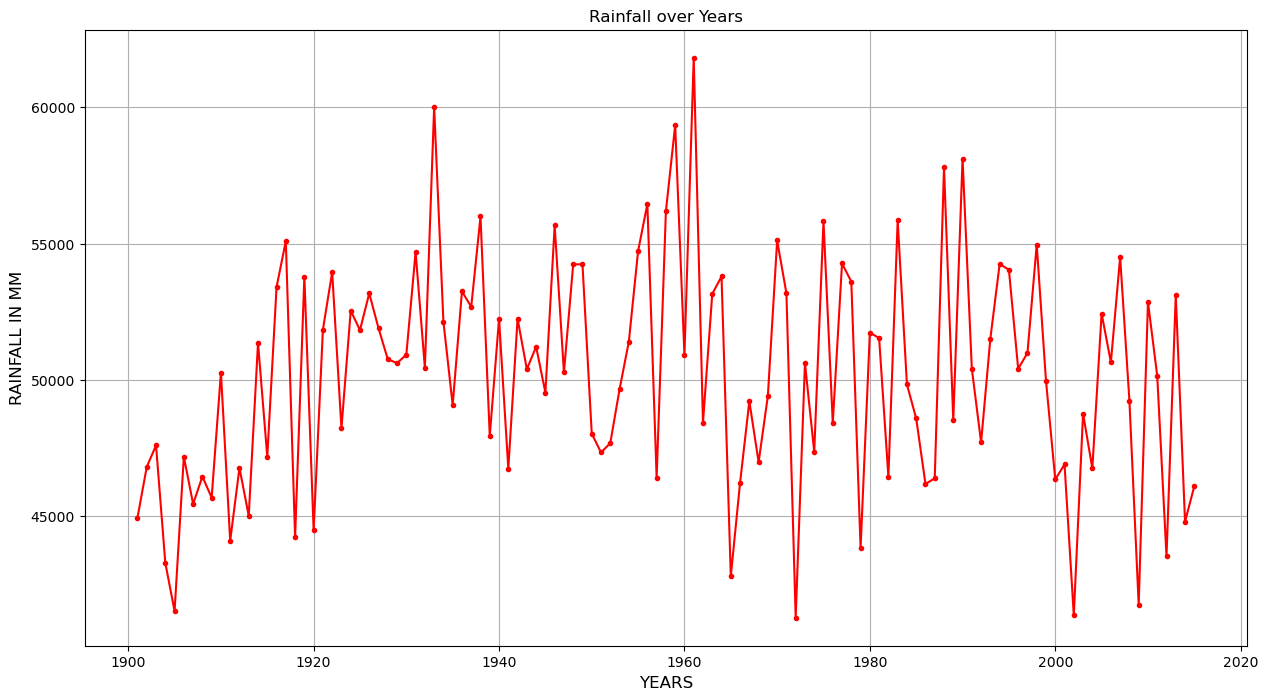

In [20]:
plt.figure(figsize=(15,8))
data.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",  linestyle="-")
plt.title("Rainfall over Years")
plt.show()

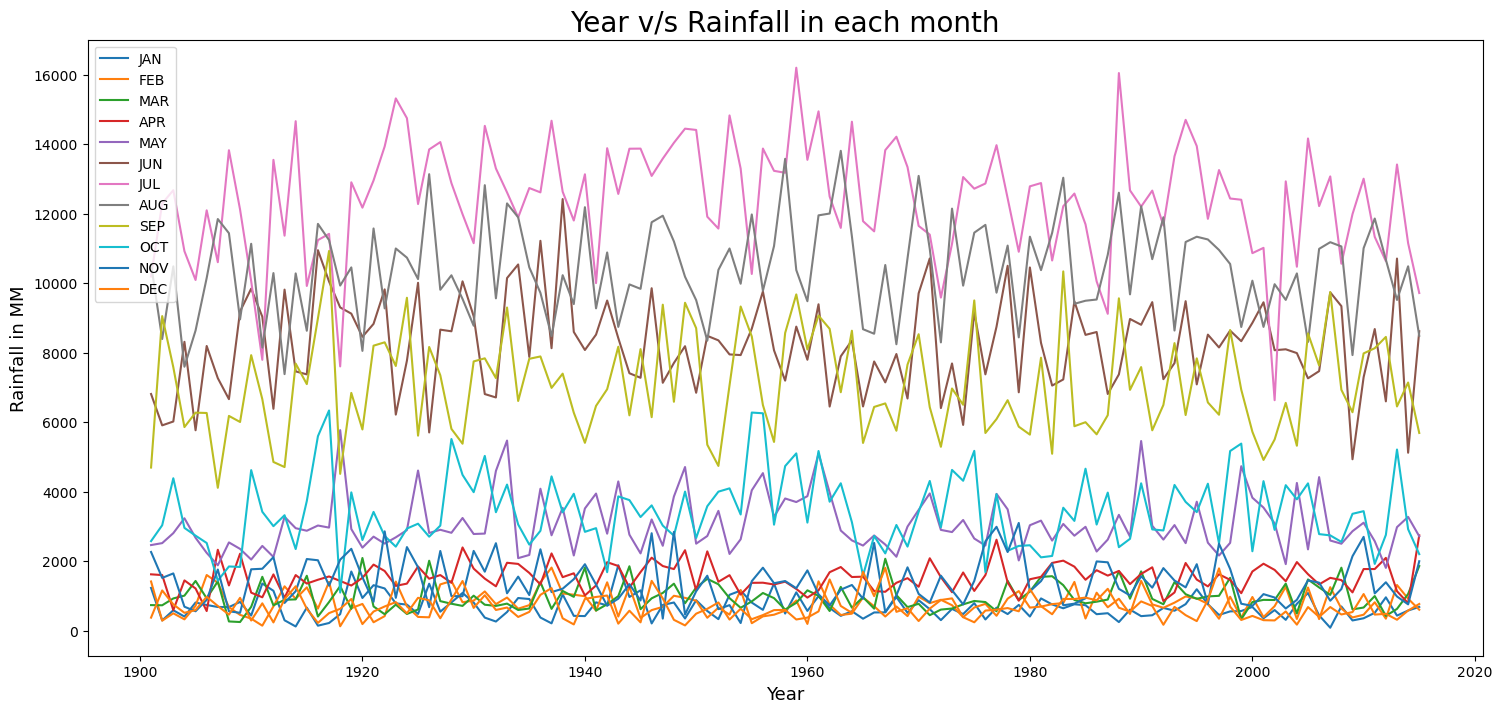

In [21]:
data[['YEAR','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 
    'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

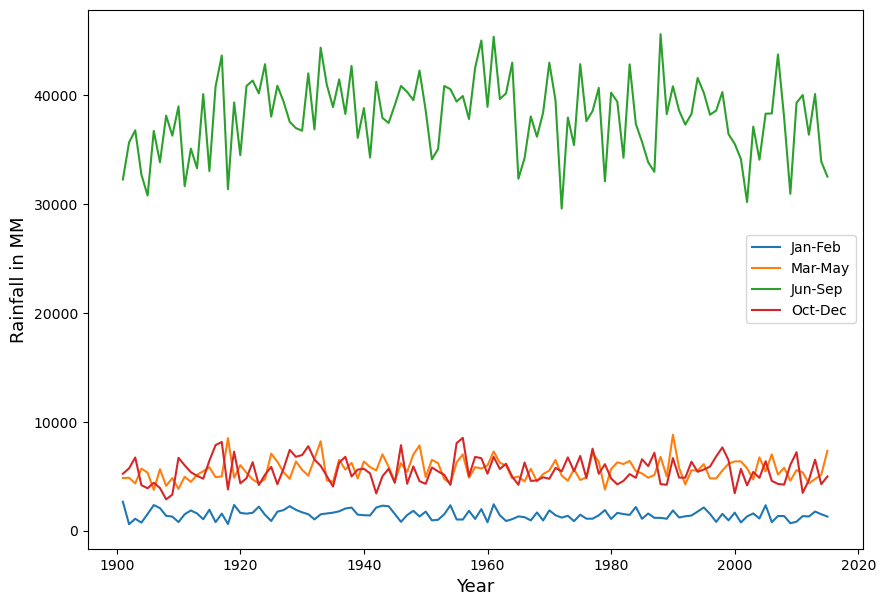

In [22]:
data[['YEAR','Jan-Feb','Mar-May',
   'Jun-Sep','Oct-Dec']].groupby("YEAR").sum().plot(figsize=(10,7))
plt.xlabel("Year", size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.show()

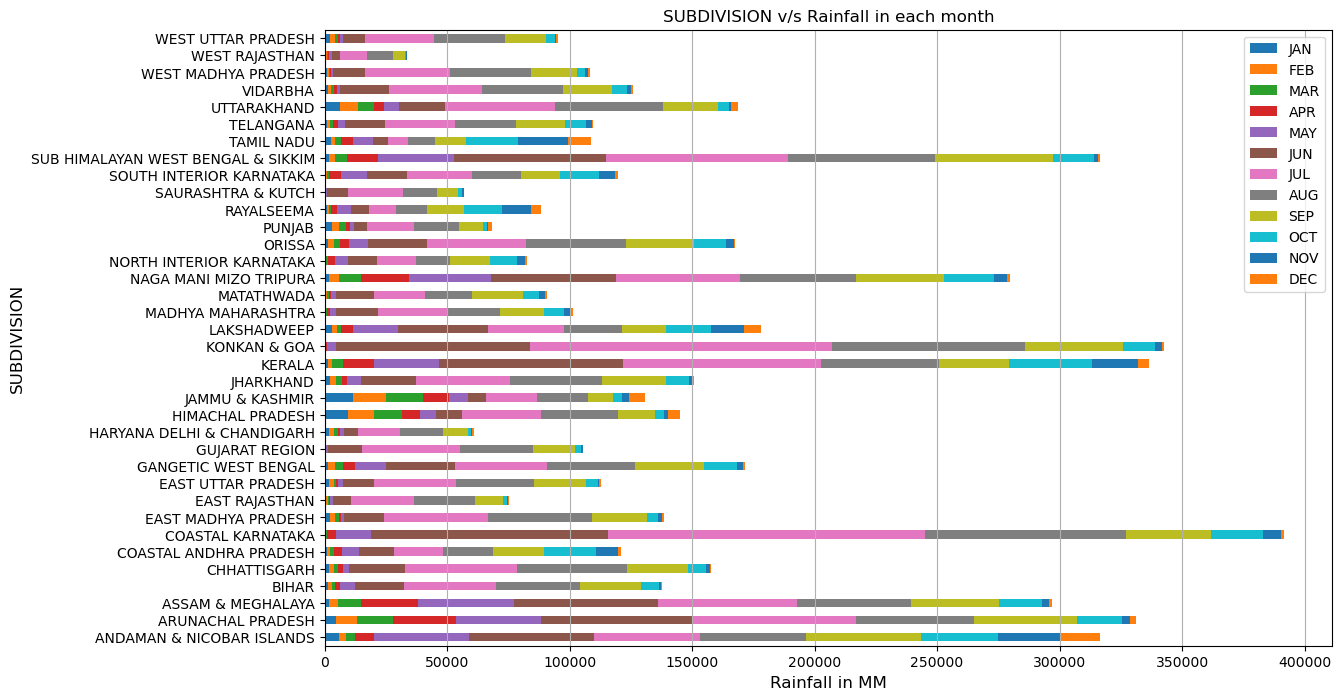

In [23]:
data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 
    'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))
plt.title("SUBDIVISION v/s Rainfall in each month")
plt.xlabel("Rainfall in MM", size=12)
plt.ylabel("SUBDIVISION",size=12)
plt.grid(axis="x",  linestyle="-")
plt.show()

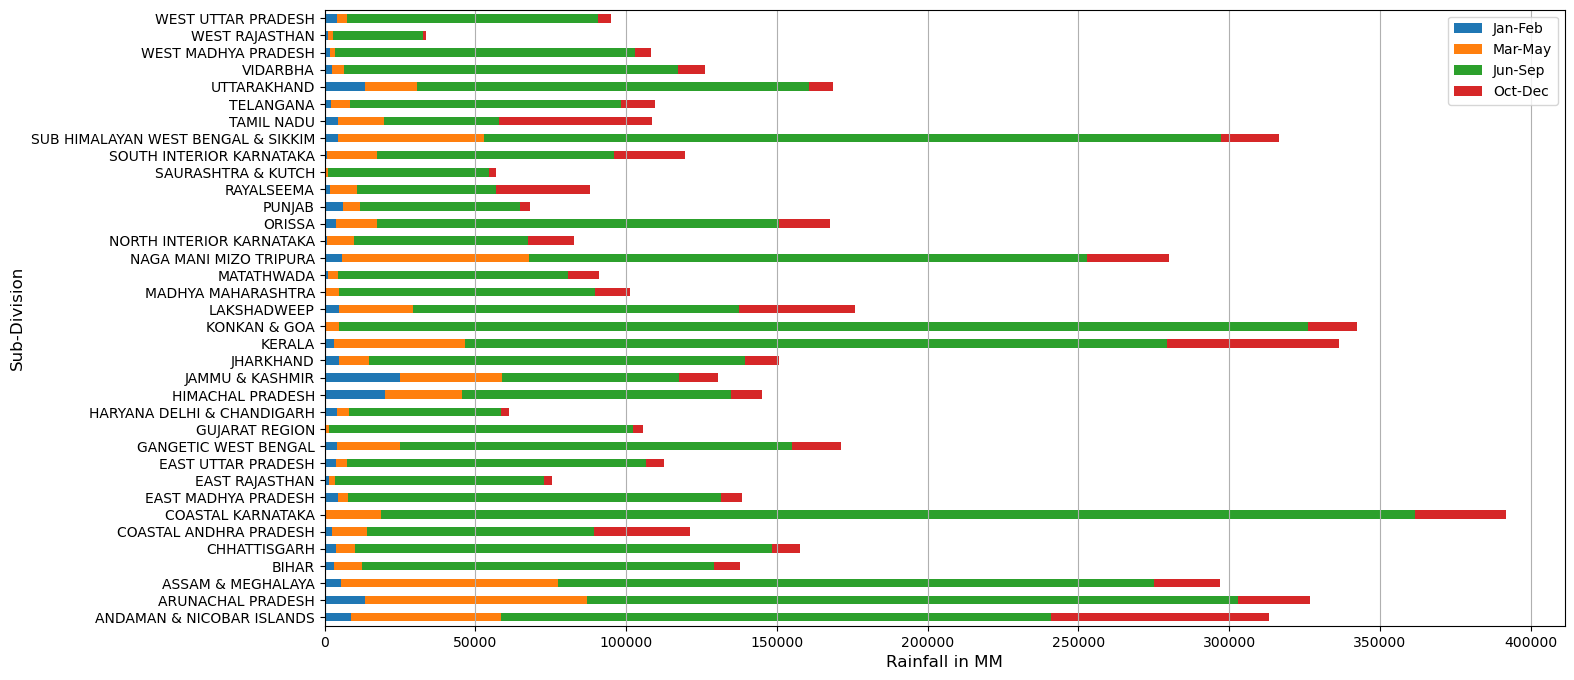

In [24]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
   'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(16,8))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x", linestyle="-")
plt.show()

In [25]:
TN = data.loc[((data['SUBDIVISION'] == 'TAMIL NADU'))]
TN.head(4)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4,960.3,63.6,131.6,350.1,415.0
3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8,1138.2,77.0,131.7,306.7,622.9
3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2,1163.9,27.1,148.4,456.5,531.9
3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1,663.1,35.3,142.1,249.9,235.8


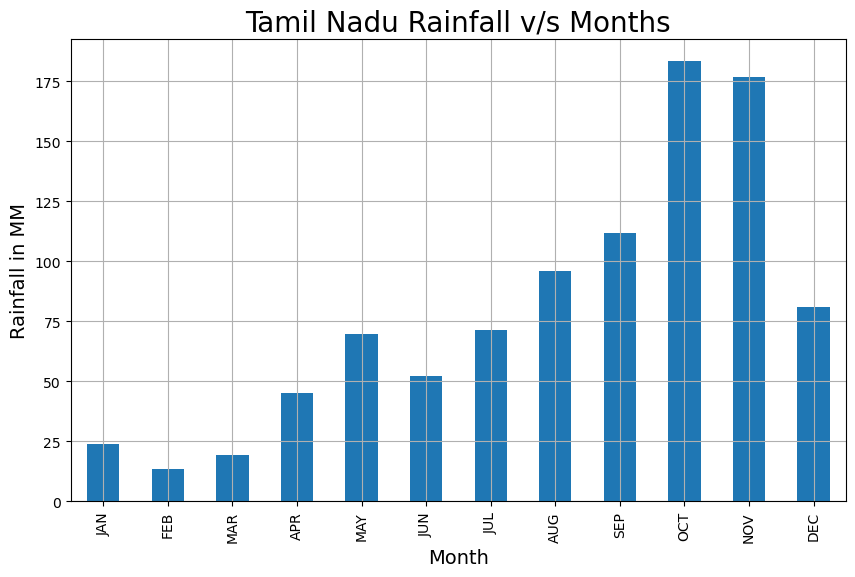

In [26]:
plt.figure(figsize=(10,6))
TN[['JAN', 'FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("Tamil Nadu Rainfall v/s Months",size=20)
plt.xlabel("Month",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-")
plt.show()

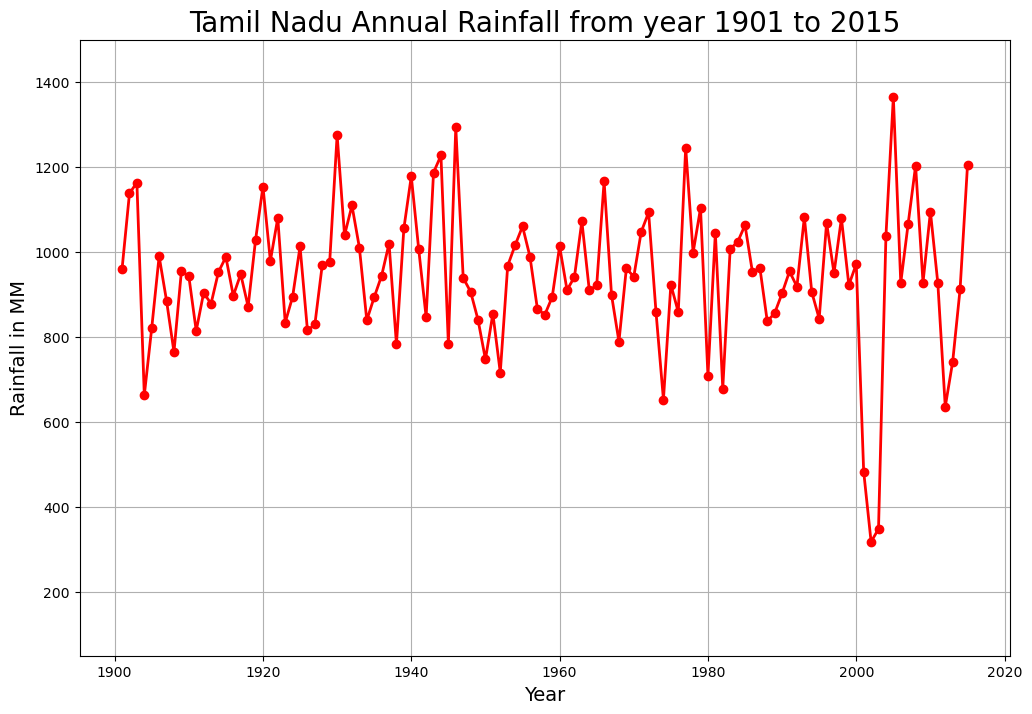

In [27]:
TN.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('Tamil Nadu Annual Rainfall from year 1901 to 2015',size=20)
plt.grid()
plt.show()

In [28]:
Rajasthan = data.loc[((data['SUBDIVISION'] == 'WEST RAJASTHAN') | (data['SUBDIVISION'] == 'East RAJASTHAN'))]
Rajasthan.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
1817,WEST RAJASTHAN,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1818,WEST RAJASTHAN,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
1819,WEST RAJASTHAN,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
1820,WEST RAJASTHAN,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
1821,WEST RAJASTHAN,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9


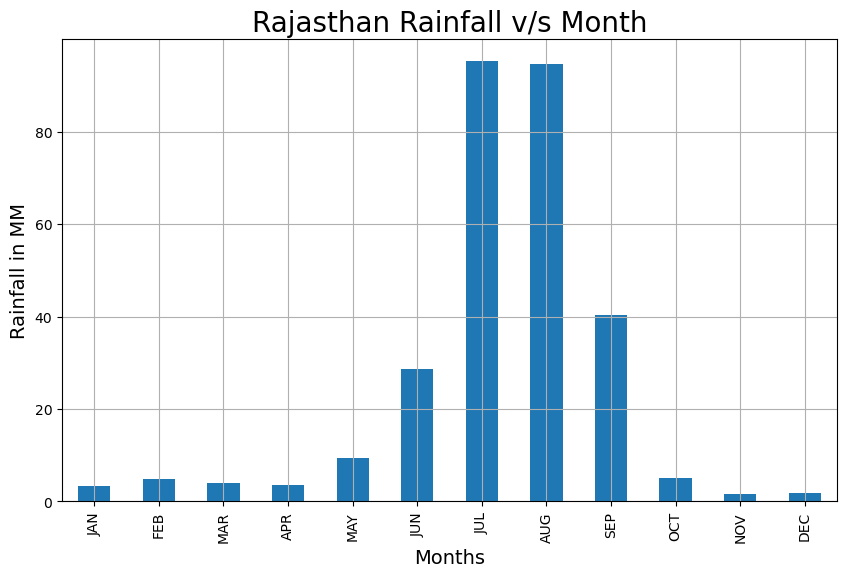

In [29]:
plt.figure(figsize=(10,6))
Rajasthan[['JAN', 'FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("Rajasthan Rainfall v/s Month",size=20)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-")
plt.show()

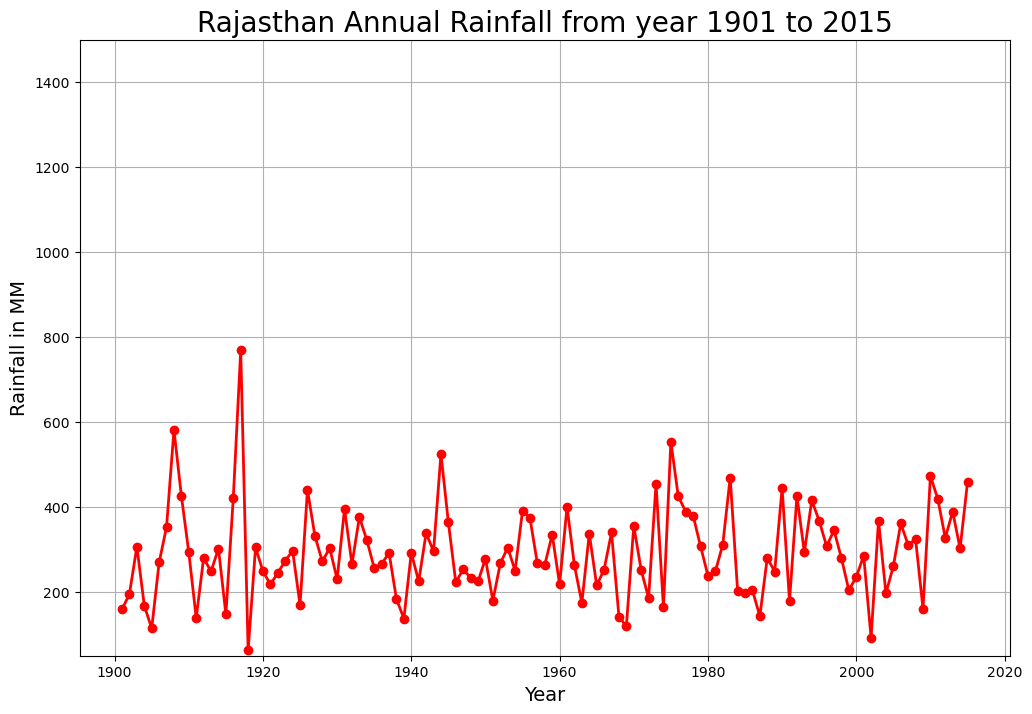

In [30]:
Rajasthan.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('Rajasthan Annual Rainfall from year 1901 to 2015',size=20)
plt.grid()
plt.show()

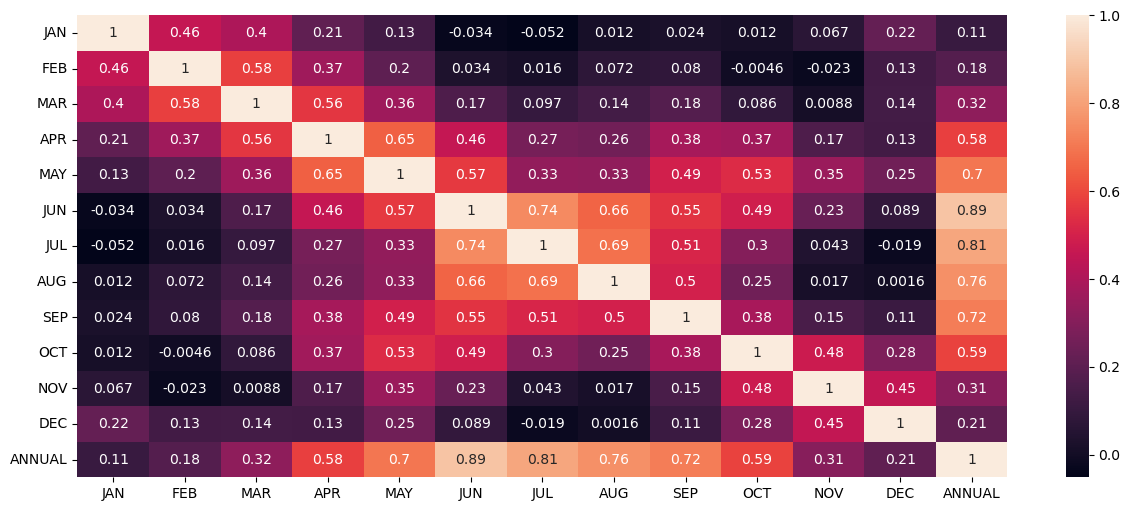

In [31]:
plt.figure(figsize=(15,6))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()                

In [32]:
data['SUBDIVISION'].nunique()

36

In [33]:
group = data.groupby('SUBDIVISION')[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]


In [34]:
group = data.groupby('SUBDIVISION')[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
data_grouped = group.get_group('TAMIL NADU')
data_grouped.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
3427,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4
3428,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8
3429,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2
3430,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1
3431,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,250.4,123.7,3.2


In [35]:
df = data.melt(['YEAR']).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,SUBDIVISION,ANDAMAN & NICOBAR ISLANDS
1,1,1902,SUBDIVISION,ANDAMAN & NICOBAR ISLANDS
2,2,1903,SUBDIVISION,ANDAMAN & NICOBAR ISLANDS
3,3,1904,SUBDIVISION,ANDAMAN & NICOBAR ISLANDS
4,4,1905,SUBDIVISION,ANDAMAN & NICOBAR ISLANDS


In [36]:
df= df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,SUBDIVISION,ANDAMAN & NICOBAR ISLANDS
207,207,1901,SUBDIVISION,ASSAM & MEGHALAYA
322,322,1901,SUBDIVISION,NAGA MANI MIZO TRIPURA
437,437,1901,SUBDIVISION,SUB HIMALAYAN WEST BENGAL & SIKKIM
552,552,1901,SUBDIVISION,GANGETIC WEST BENGAL


In [37]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [38]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score, accuracy_score
from sklearn import metrics

# Load the data
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Assuming 'YEAR' is the feature and 'ANNUAL' is the target variable
X = data[['YEAR']]
y = data['ANNUAL']

# Handling missing values
data.dropna(subset=['YEAR', 'ANNUAL'], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling missing values in the target variable
y_train = y_train.dropna()

# Ensure consistency in the number of samples
X_train = X_train.iloc[:len(y_train), :]

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_test_predict = model.predict(X_test)


# Continue with the rest of the code for R2 score, F1 score, and accuracy

In [3]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import accuray_score
y

In [4]:
y_pred = model.predict(X_test)

In [5]:
y_train = model.predict(X_test)

In [6]:
# splitting the dataset into training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined
# Handle NaN values in your target variable y_train
X_train_cleaned, y_train_cleaned = X_train[~np.isnan(y_train)], y_train[~np.isnan(y_train)]

# Split your cleaned data into training and testing sets
X_train_split, X_test, y_train_split, y_test = train_test_split(X_train_cleaned, y_train_cleaned, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
LR = LinearRegression()
LR.fit(X_train_split, y_train_split)

# Make predictions on the test set
y_test_predict = LR.predict(X_test)
# Make predictions on the training set
y_train_predict = LR.predict(X_train_split)

# Evaluate and print metrics for the test data
print("-------Test Data-------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

# Evaluate and print metrics for the training data
print("\n------Train Data------")
print('MAE:', metrics.mean_absolute_error(y_train_split, y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train_split, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train_split, y_train_predict)))

# Training Accuracy
print("\n----Training Accuracy-----")
training_accuracy = LR.score(X_train_split, y_train_split)
print(round(training_accuracy, 3) * 100)

# Testing Accuracy
print("-----Testing Accuracy-----")
testing_accuracy = LR.score(X_test, y_test)
print(round(testing_accuracy, 3) * 100)


-------Test Data-------
MAE: 660.72287650019
RMSE: 852.8734518760757

------Train Data------
MAE: 703.7908549566823
MSE: 843578.8555338216
RMSE: 918.4654895715036

----Training Accuracy-----
0.0
-----Testing Accuracy-----
-0.5


In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter=100000)

# Define the parameter grid
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

lasso_regressor = GridSearchCV(
    lasso, parameters,
    scoring='neg_mean_squared_error',  # Use 'neg_mean_squared_error' for Lasso
    cv=5
)

In [1]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

# Define the parameter grid
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

ridge_regressor = GridSearchCV(
    ridge,
    parameters,
    scoring='neg_mean_squared_error',  # Use 'neg_mean_squared_error' for Ridge
    cv=5
)


In [ ]:
ridge_regressor.fit(X_train_cleaned, y_train_cleaned)


In [ ]:
print("Best Parameter for Ridge:",ridge_regressor.best_estimator_)

In [ ]:
ridge = Ridge(alpha=100.0)

In [ ]:
from sklearn import preprocessing 
from sklearn import svm 

svm_regr = svm.SVC(kernel='rbf')
from sklearn import preprocessing 
from sklearn import svm 


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import SVC


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

NameError: name 'SVC' is not defined

NameError: name 'X_train' is not defined

NameError: name 'X_train' is not defined

SyntaxError: invalid syntax (2899723155.py, line 1)

In [20]:
from sklearn import svm

# Instantiate the SVM model
Svm_model = svm.SVC()

# Fit the model to your training data
Svm_model.fit(X_train_split, y_train)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
y_pred = Svm_model.predict(X_test,y_test)

In [ ]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [8]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

NameError: name 'svm_regr' is not defined

In [9]:
from sklearn import metrices
print("-------Test Data-------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))

print("\n------Train Data------")
print('MAE:',metrics.mean_absolute_error(y_train, y_train_predict))
print('MSE:' metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))

print("\n----Training Accuracy-----")
print(round(svm.regr.score(X_train,y_train),3)*100)
print("-----Testing Accuracy-----")
print(round(svm_regr.score(X_test,y_test),3)*100)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (946534323.py, line 5)

In [10]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(
    max_depth=100,
    max_features='sqrt',
    min_samples_leaf=4,  # Corrected parameter name
    min_samples_split=10,
    n_estimators=800
)

random_forest_model.fit(X_train, y_train)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [11]:
from sklearn.ensemble  import RandomForestRegressor
randow_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_sample_leaf=4,
                                            min_samples_split=10, n_estimator=800)
randow_forest_model.fit(X_train, y_train)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
y_train_predict =random_forest_model.predict(X_train)
y_test_predict =randow_forest_model.predict(X_test)

In [ ]:
print("-------Test Data-------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))

print("\n------Train Data------")
print('MAE:',metrics.mean_absolute_error(y_train, y_train_predict))
print('MSE:' metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))

In [12]:
print("\n----Training Accuracy-----")
print(round(randow_forest.score(X_train,y_train),3)*100)
print("-----Testing Accuracy-----")
print(round(random_forest_model.score(X_test,y_test),3)*100)


----Training Accuracy-----


NameError: name 'randow_forest' is not defined

In [13]:
preicted = random_forest_model.predict([[2016,11]])

NameError: name 'random_forest_model' is not defined

In [14]:
predicted

NameError: name 'predicted' is not defined